<a href="https://colab.research.google.com/github/Rimo-rimo/boostcamp_AI/blob/main/DeepLearning_Basics/mlp%EA%B3%BC%EC%A0%9C_%EC%B5%9C%EC%A2%85%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/sjchoi86/upstage-basic-deeplearning/blob/main/notebook/mlp.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/sjchoi86/upstage-basic-deeplearning/blob/main/notebook/mlp.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View Source</a>
  </td>
</table>

# Multilayer Perceptron (MLP)
이번 과제는 Multi-layer perceptron 을 사용한 MNIST classification을 구현해봅니다. 밑바닥부터 구현하는 것은 아니고 "FILL IN HERE" 부분을 채우시면 됩니다. 지워진 부분을 찾아서 코드를 작성한 후 실행해보세요.

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
%matplotlib inline
%config InlineBackend.figure_format='retina'
print ("PyTorch version:[%s]."%(torch.__version__))
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print ("device:[%s]."%(device))

PyTorch version:[1.10.0+cu111].
device:[cuda:0].


### Dataset
 MNIST는 간단한 컴퓨터 비전 데이터 세트로, 아래와 같이 손으로 쓰여진 이미지들로 구성되어 있습니다. 숫자는 0에서 1까지의 값을 갖는 고정 크기 이미지 (28x28 픽셀)로 크기 표준화되고 중심에 배치되었습니다.
 
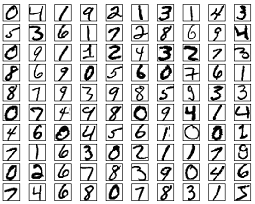
 

In [40]:
from torchvision import datasets,transforms
mnist_train = datasets.MNIST(root='./data/',train=True,transform=transforms.ToTensor(),download=True)
mnist_test = datasets.MNIST(root='./data/',train=False,transform=transforms.ToTensor(),download=True)
print ("mnist_train:\n",mnist_train,"\n")
print ("mnist_test:\n",mnist_test,"\n")
print ("Done.")

mnist_train:
 Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data/
    Split: Train
    StandardTransform
Transform: ToTensor() 

mnist_test:
 Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data/
    Split: Test
    StandardTransform
Transform: ToTensor() 

Done.


### Data Iterator

In [41]:
BATCH_SIZE = 256
train_iter = torch.utils.data.DataLoader(mnist_train,batch_size=BATCH_SIZE,shuffle=True,num_workers=1) 
# suffle을 틀어줘야 한 이터레이션이 끝나고 다음 이터레이션으로 넘어갔을때, 다른 데이터 조합을 또 가져올 수 있다.
test_iter = torch.utils.data.DataLoader(mnist_test,batch_size=BATCH_SIZE,shuffle=True,num_workers=1)
print ("Done.")

Done.


### Define the MLP model

In [42]:
class MultiLayerPerceptronClass(nn.Module):
    """
        Multilayer Perceptron (MLP) Class
    """
    def __init__(self,name='mlp',xdim=784,hdim=256,ydim=10):
        super(MultiLayerPerceptronClass,self).__init__()
        self.name = name
        self.xdim = xdim # 입력 차원
        self.hdim = hdim # 히든 차원
        self.ydim = ydim # 출력 차원
        self.lin_1 = nn.Linear(self.xdim, self.hdim) # -> 입력된 x차원을 h차원으로 선형 변환을 시켜 준다.
        self.lin_2 = nn.Linear(self.hdim, self.ydim) # -> 입력된 h차원을 y차원으로 선형 변환을 시켜 준다.
        self.init_param() # initialize parameters -> 학습 시작 전 이전 파라미터들을 새롭게 초기화
        
    def init_param(self):
        nn.init.kaiming_normal_(self.lin_1.weight) # -> he 방법으로 weight들을 초기화(relu함수를 활성화 함수로 가질때, xavier초기화의 단점을 보완한 방법: https://reniew.github.io/13/)
        nn.init.zeros_(self.lin_1.bias) # bias는 0으로 초기화
        nn.init.kaiming_normal_(self.lin_2.weight)
        nn.init.zeros_(self.lin_2.bias)

    def forward(self,x):
        net = x
        net = self.lin_1(net)
        net = F.relu(net)
        net = self.lin_2(net)
        #마지막 단계에서는 굳이 활성화 함수가 필요가 없다
        return net

M = MultiLayerPerceptronClass(name='mlp',xdim=784,hdim=256,ydim=10).to(device) # 모델 생성
loss = nn.CrossEntropyLoss() # 손실함수로 크로스엔트로피함수를 사용 -> 분류문제에서 많이 사용
optm = optim.Adam(M.parameters(),lr=1e-3) # 옵티마이저로 Adam 설정(학습률 : 0.003)
print ("Done.")

Done.


### Simple Forward Path of the MLP Model

In [43]:
x_numpy = np.random.rand(2,784)
x_torch = torch.from_numpy(x_numpy).float().to(device) # numpy를 torch로 변형해주고, 이를 float자료형으로 변환후, 이를 device(cpu or gpu)로 보내준다.
y_torch = M.forward(x_torch) # forward path  = "M(x_torch)"
y_numpy = y_torch.detach().cpu().numpy() # torch tensor to numpy array # 결과를 numpy로 보기 위해 다시 변환
print ("x_numpy:\n",x_numpy)
print ("x_torch:\n",x_torch)
print ("y_torch:\n",y_torch)
print ("y_numpy:\n",y_numpy)

x_numpy:
 [[0.639 0.399 0.519 ... 0.352 0.952 0.072]
 [0.906 0.488 0.5   ... 0.884 0.799 0.07 ]]
x_torch:
 tensor([[0.6385, 0.3993, 0.5191,  ..., 0.3517, 0.9521, 0.0724],
        [0.9062, 0.4877, 0.4998,  ..., 0.8840, 0.7987, 0.0699]],
       device='cuda:0')
y_torch:
 tensor([[ 0.1460, -0.0649,  0.0796, -0.0839, -0.1364,  0.8536,  0.1630,  0.0039,
         -1.7269,  0.3480],
        [ 0.3001,  0.2914, -0.6160, -0.0976, -0.2332,  0.6345,  0.7035, -0.7496,
         -1.7826,  0.0545]], device='cuda:0', grad_fn=<AddmmBackward0>)
y_numpy:
 [[ 0.146 -0.065  0.08  -0.084 -0.136  0.854  0.163  0.004 -1.727  0.348]
 [ 0.3    0.291 -0.616 -0.098 -0.233  0.635  0.703 -0.75  -1.783  0.054]]


In [44]:
len(list(M.parameters())[2][1])

256

### Check Parameters

In [45]:
np.set_printoptions(precision=3)
n_param = 0
for p_idx,(param_name,param) in enumerate(M.named_parameters()): 
    param_numpy = param.detach().cpu().numpy()
    n_param += len(param_numpy.reshape(-1))
    print ("[%d] name:[%s] shape:[%s]."%(p_idx,param_name,param_numpy.shape))
    print ("    val:%s"%(param_numpy.reshape(-1)[:5]))
print ("Total number of parameters:[%s]."%(format(n_param,',d'))) # ->(784*256) + (256) + (256*10) + (10)

[0] name:[lin_1.weight] shape:[(256, 784)].
    val:[-0.015 -0.064  0.075  0.04  -0.033]
[1] name:[lin_1.bias] shape:[(256,)].
    val:[0. 0. 0. 0. 0.]
[2] name:[lin_2.weight] shape:[(10, 256)].
    val:[-0.011 -0.018 -0.098 -0.079 -0.055]
[3] name:[lin_2.bias] shape:[(10,)].
    val:[0. 0. 0. 0. 0.]
Total number of parameters:[203,530].


### Evaluation Function

In [46]:
def func_eval(model,data_iter,device):
    with torch.no_grad(): # gradient를 계산하지 않겠다. 왜? 학습용이 아니라, 테스트 이기 때문에
        model.eval() # evaluate (affects DropOut and BN) -> 테스트용으로 모델을 변환 -> DropOut, BN과 같은 것이 영향받는다.
        n_total,n_correct = 0,0
        for batch_in,batch_out in data_iter:
            y_trgt = batch_out.to(device)
            model_pred = model(batch_in.view(-1,28*28).to(device))
            _,y_pred = torch.max(model_pred.data,1) # 여기서 1은  dim 으로써 각 행마다 가장 큰 값과 인덱스를 출력, dim=0이면 각 열마다 가장 큰 값과 인덱스를 출력
            n_correct += (y_pred == y_trgt).sum().item()
            n_total += batch_in.size(0)
        val_accr = (n_correct/n_total)
        model.train() # back to train mode 
    return val_accr
print ("Done")

Done


### Initial Evaluation

In [48]:
M.init_param() # initialize parameters
train_accr = func_eval(M,train_iter,device)
test_accr = func_eval(M,test_iter,device)
print ("train_accr:[%.3f] test_accr:[%.3f]."%(train_accr,test_accr))

train_accr:[0.127] test_accr:[0.135].


### Train

In [49]:
print ("Start training.")
M.init_param() # initialize parameters
M.train() # 모델을 train 모드로 변경
EPOCHS,print_every = 10,1 # 데이터 셋을 총 10번 사용하고
for epoch in range(EPOCHS):
    loss_val_sum = 0
    for batch_in,batch_out in train_iter:
        # Forward path
        y_pred = M.forward(batch_in.view(-1, 28*28).to(device)) # 값을 예측하는 단계
        loss_out = loss(y_pred,batch_out.to(device)) # 실제값과 예측값 사이의 오차 구하는 단계(손실함수에 따라)
        # Update
        optm.zero_grad()     # reset gradient   -> 각 파라미터에 해당하는 그레디언트를 0으로 초기화
        loss_out.backward()  # backpropagate    -> 각각의 오차에 대한 그레디언트를 구해준다.
        optm.step()          # optimizer update -> 새로 구한 그레디언트로 각각의 파라미터들을 업데이트, 이동 시켜준다. 
        loss_val_sum += loss_out
    loss_val_avg = loss_val_sum/len(train_iter)
    # Print
    if ((epoch%print_every)==0) or (epoch==(EPOCHS-1)):
        train_accr = func_eval(M,train_iter,device) # 학습한 데이터에 대한 평가
        test_accr = func_eval(M,test_iter,device)   # 학습에 사용하지 않은, 테스트 데이터에 대한 평가
        print ("epoch:[%d] loss:[%.3f] train_accr:[%.3f] test_accr:[%.3f]."%
               (epoch,loss_val_avg,train_accr,test_accr))
print ("Done")        

Start training.
epoch:[0] loss:[0.374] train_accr:[0.948] test_accr:[0.945].
epoch:[1] loss:[0.163] train_accr:[0.966] test_accr:[0.961].
epoch:[2] loss:[0.113] train_accr:[0.975] test_accr:[0.968].
epoch:[3] loss:[0.088] train_accr:[0.982] test_accr:[0.973].
epoch:[4] loss:[0.070] train_accr:[0.985] test_accr:[0.976].
epoch:[5] loss:[0.057] train_accr:[0.989] test_accr:[0.977].
epoch:[6] loss:[0.047] train_accr:[0.990] test_accr:[0.976].
epoch:[7] loss:[0.039] train_accr:[0.992] test_accr:[0.977].
epoch:[8] loss:[0.033] train_accr:[0.994] test_accr:[0.978].
epoch:[9] loss:[0.027] train_accr:[0.994] test_accr:[0.978].
Done


### Test

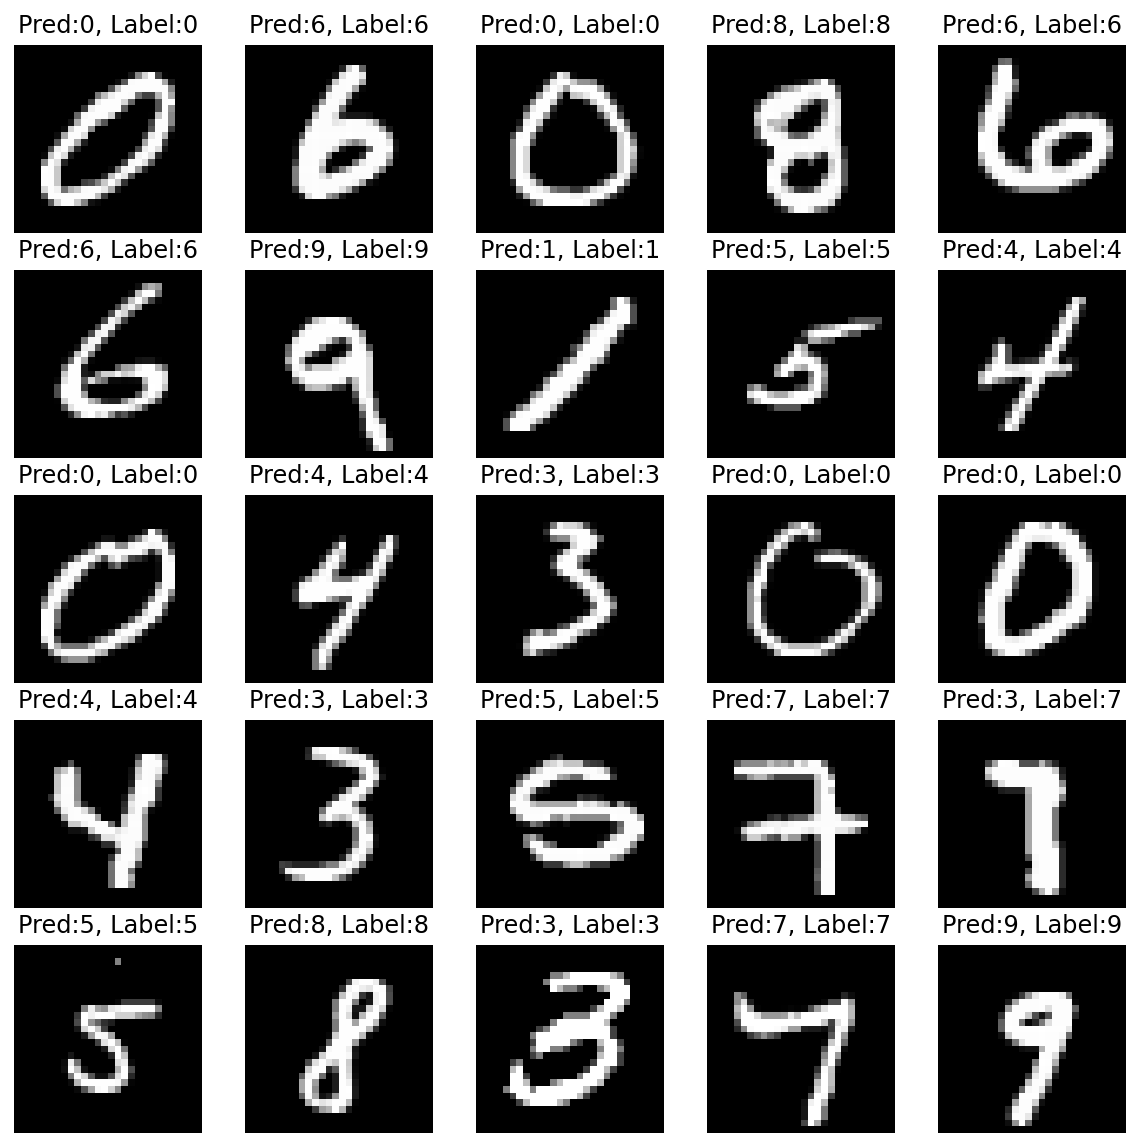

Done


In [50]:
n_sample = 25
sample_indices = np.random.choice(len(mnist_test.targets), n_sample, replace=False)
test_x = mnist_test.data[sample_indices]
test_y = mnist_test.targets[sample_indices]
with torch.no_grad():
    y_pred = M.forward(test_x.view(-1, 28*28).type(torch.float).to(device)/255.)
y_pred = y_pred.argmax(axis=1)
plt.figure(figsize=(10,10))
for idx in range(n_sample):
    plt.subplot(5, 5, idx+1)
    plt.imshow(test_x[idx], cmap='gray')
    plt.axis('off')
    plt.title("Pred:%d, Label:%d"%(y_pred[idx],test_y[idx]))
plt.show()    
print ("Done")